In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\crfra\anaconda\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Load your ticker symbols from Yahoo Finance
tickers = ['AA', 'NLY', 'T', 'XOM']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2015-01-02 to 2020-05-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AA      1348 non-null   float64
 1   NLY     1348 non-null   float64
 2   T       1348 non-null   float64
 3   XOM     1348 non-null   float64
dtypes: float64(4)
memory usage: 52.7 KB


In [4]:
# List beginning row entries given date of origin
mydata.head()

,AA,NLY,T,XOM
Date,,,,
2015-01-02,37.242069,6.031793,25.006248,75.439079
2015-01-05,35.084465,5.971693,24.769997,73.374931
2015-01-06,35.342445,6.004474,24.806910,72.984848
2015-01-07,36.257076,5.977157,24.836861,73.724373
2015-01-08,37.288971,5.960766,25.083960,74.951500


In [5]:
# List ending rows
mydata.tail()

,AA,NLY,T,XOM
Date,,,,
2020-05-05,7.81,6.28,29.740000,44.830002
2020-05-06,7.71,6.04,28.790001,43.990002
2020-05-07,7.49,6.09,28.889999,44.240002
2020-05-08,8.07,6.21,29.790001,46.180000
2020-05-11,7.77,6.03,29.379999,45.740002


In [6]:
# Extract data from first row of the table
mydata.iloc[0]

AA     37.242069
NLY     6.031793
T      25.006248
XOM    75.439079
Name: 2015-01-02 00:00:00, dtype: float64

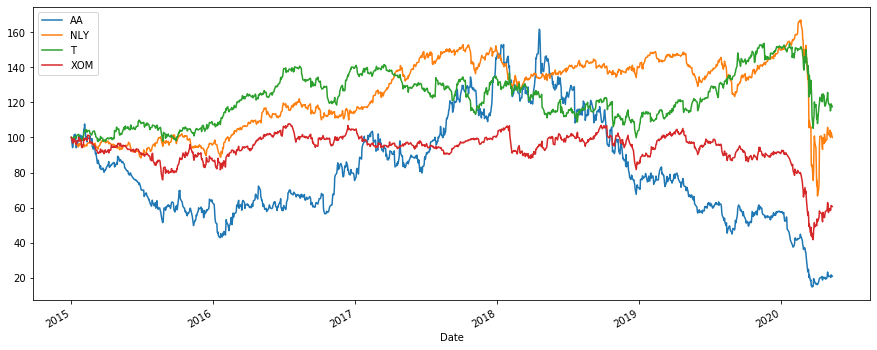

In [7]:
# Normalize the values of the stocks and set the size of the figure
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

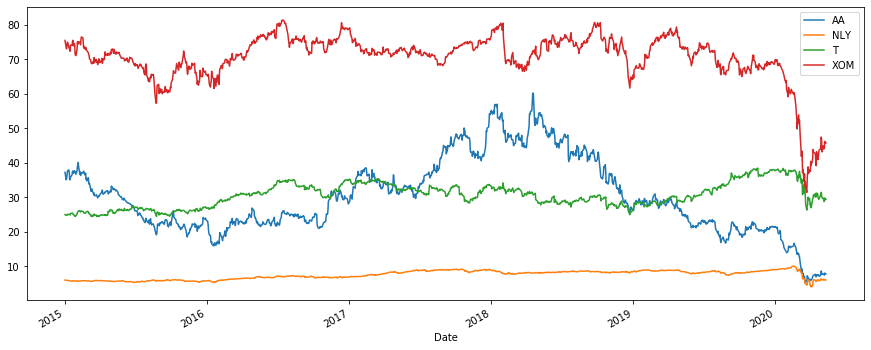

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
# To properly apply loc, it is very important to provide the precise row (or column) label
mydata.loc['Jan 06, 2015']

AA     35.342445
NLY     6.004474
T      24.806910
XOM    72.984848
Name: 2015-01-06 00:00:00, dtype: float64

In [10]:
# To properly apply iloc, it is important to point to a particular position in the index
mydata.iloc[2]

AA     35.342445
NLY     6.004474
T      24.806910
XOM    72.984848
Name: 2015-01-06 00:00:00, dtype: float64

# Calculate the Return of a Portfolio of Securities

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,AA,NLY,T,XOM
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.057935,-0.009964,-0.009448,-0.027362
2015-01-06,0.007353,0.005489,0.001490,-0.005316
2015-01-07,0.025879,-0.004549,0.001207,0.010133
2015-01-08,0.028461,-0.002742,0.009949,0.016645


In [12]:
weights = np.array([0.25,0.25,0.25,0.25])

In [13]:
# calculate vector and/or matrix products using the .dot method
np.dot(returns, weights)

array([        nan, -0.02617697,  0.0022541 , ..., -0.00277494,
        0.04303634, -0.02236278])

In [14]:
annual_returns = returns.mean() * 250
annual_returns

AA    -0.175937
NLY    0.038458
T      0.053768
XOM   -0.061717
dtype: float64

In [15]:
# The .dot method helps us obtain one number across multiple stock tickers
np.dot(annual_returns, weights)

-0.03635687922890948

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
pfolio_1

'-3.636%'

In [17]:
# Calculating portfolio return with weights that vary in size
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [18]:
# Print Portfolio Return after inputing new weight formula. Notice that we were better off with evenly dirstirubted weights.
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
pfolio_2

'-5.0009999999999994%'